# Machine Learning

1. Supervised Learning
    1. Regression (predict value)
    1. Classification (predict label)
1. Unsupervised Learning
    1. **Clustering**
    1. Dimensionality reduction

# Clustering
* find out the groups in a dataset

## K-means

<img src='kmeans.png' width='300'>

**Generate a dataset**

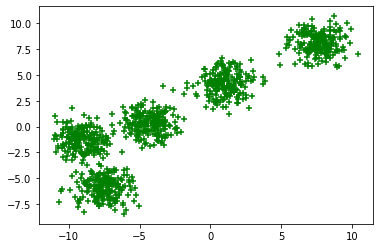

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, label = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=3)

plt.scatter(X[:,0], X[:,1], c='g', marker='+')

<img src='kmean_point.png' width='350'>

In [2]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=1)
model.fit(X)

print(f'Cluster centers:\n{model.cluster_centers_}')
model.labels_ # the assigned cluster label of each point

# model.cluster_centers_ # there are n cluster (numpy ndarray)
model.cluster_centers_[model.labels_].shape # the assigned cluster position of each point (fancy index)

Cluster centers:
[[ 1.02354169  4.16586441]
 [-7.53509792 -5.88548715]
 [ 7.63345485  8.07499566]
 [-9.03348526 -1.28804126]
 [-4.27948341  0.34711562]]


(1000, 2)

In [3]:
model.predict([[10,10]])  # most clustering algorithm cannot predict new points, but k-means can do so

array([2])

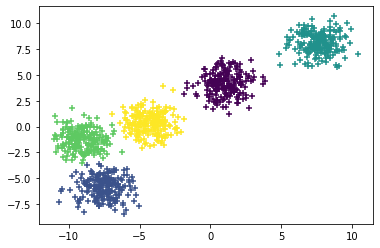

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, marker='+') 

**Silhouette**
* measure of how similar an object is to its own cluster compared to other clusters

In [5]:
# Silhouette_score() compute the mean Silhouette score
# from -1 to +1, -1 => in wrong clusters, 0 => overlapping clusters, +1 => in the right clusters

from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)

0.6680512977155848

**Find out the best k value using Silhouette Score**

Wall time: 398 ms


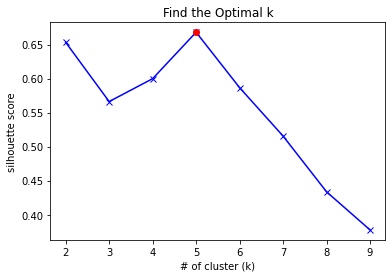

In [6]:
%%time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sum_of_squares_distances = []
silhouetee_score_list = []
kRange = range(2, 10)
for k in kRange:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans = kmeans.fit(X)
    # kmeans minimize within-cluster sum-of-squares (inertia) 
    # for this k value
    # sum_of_squares_distances.append(kmeans.inertia_)
    score_avg = silhouette_score(X, kmeans.labels_) # it may take some time
    silhouetee_score_list.append(score_avg)

# Optimal k value should have a high sihouette score
import matplotlib.pyplot as plt
plt.plot(kRange, silhouetee_score_list, 'bx-')
plt.xlabel('# of cluster (k)')
plt.ylabel('silhouette score')
plt.title('Find the Optimal k')

max_y = max(silhouetee_score_list)
xpos = silhouetee_score_list.index(max_y)
max_x = kRange[xpos]
plt.plot(max_x, max_y, 'ro') # highlight this point

---

**Example application: Color Quantization**

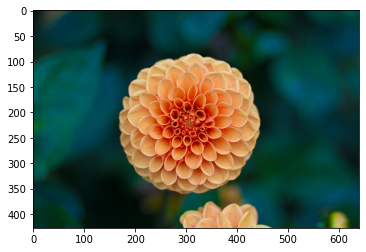

In [7]:
# replacing average color of clusters
# k clusters -> k colors
from sklearn.datasets import load_sample_image
img = load_sample_image("flower.jpg")
# img.shape # (427, 640, 3) => 427 height x 640 width x RGB
X_color = img.reshape(-1, 3) # (273280, 3) => 273280 rows (points), with R, G, B columns

plt.imshow(img) # the image

<img src='kmean_color.png' width='350'>

In [8]:
# do clustering on all color points, to find out k main color clusters (not about the shape)
kmeans = KMeans(n_clusters=2).fit(X_color) 
# fancy index to construct new image (using cluster centers as representative)
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # *** ASSIGN AVERAGE COLOR HERE ***
segmented_img = segmented_img.reshape(img.shape) # back to (427, 640, 3)

# kmeans.cluster_centers_ # the average color of each cluster
# kmeans.labels_ # the assigned cluster of this data point

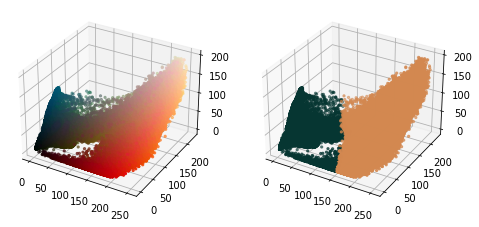

In [9]:
import numpy as np
def originalColorList(X_color):
    return np.array(X_color)/255
    
def clusterColorList(cluster_centers_):
    return np.array(cluster_centers_)/255

# plot X_color
import matplotlib.pyplot as plt
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d') # index 1
ax2 = fig.add_subplot(1, 2, 2, projection='3d') # index 2
# 3d scatter with original colors
ax1.scatter(X_color[:,0], X_color[:,1], X_color[:,2], marker='.', c=originalColorList(X_color))
# 3d scatter with clustered colors
ax2.scatter(X_color[:,0], X_color[:,1], X_color[:,2], marker='.', c=clusterColorList(kmeans.cluster_centers_)[kmeans.labels_])

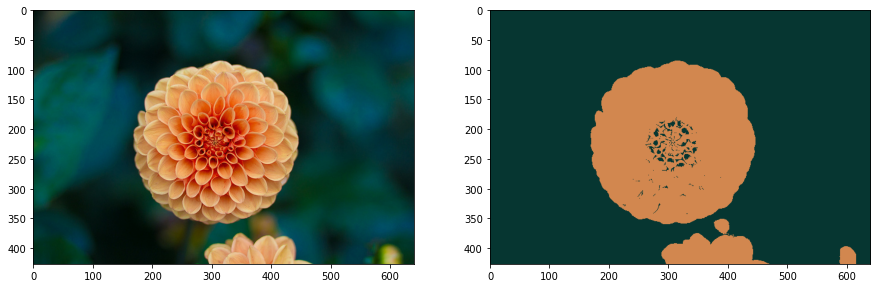

In [10]:
# show the image
fig, axes = plt.subplots(1, 2, figsize=(15,15))
axes[0].imshow(img)
axes[1].imshow(segmented_img.astype('uint8'))

**Problem of K-means**

1. Must know the k value
1. May reach local optimum solution
1. Unable to detect outliers 

---

## DBSCAN

**Generate a dataset**

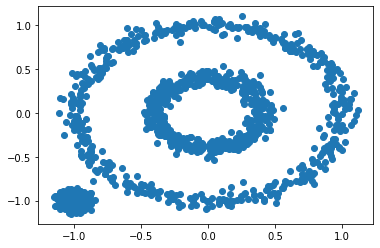

In [11]:
import numpy as np
from sklearn.datasets import make_circles

# DBSCAN can solve this easily
X1, y1 = make_circles(n_samples=1000, factor=0.4, noise=0.05, random_state=1)
X2, y2 = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1]], cluster_std=[[0.05]], random_state=0)
X_combine = np.concatenate((X1, X2))

plt.scatter(X_combine[:, 0], X_combine[:, 1])

**Find the clusters using K-means (Failed)**

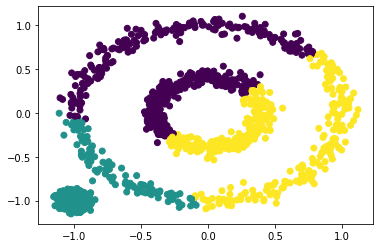

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=1)
kPred = model.fit_predict(X_combine)
plt.scatter(X_combine[:, 0], X_combine[:, 1], c=kPred)

**Find the clusters using DBSCAN**
* Density-Based Spatial Clustering of Applications with Noise
* Hyperparameters
    * epsilon radius - all points in this circle form a neighborhood
    * min_sample - if there are more than min_sample points in this neighborhood, it's a core point
* Each cluster contains at least one core point

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png' width='350'>

* Red: core points (min_sample:4)
* Yellow: not core points, but belong to this cluster, because it can find core point(s) in its epsilon circle
* Blue: noise, outlier


CC BY-SA 4.0: https://en.wikipedia.org/wiki/File:DBSCAN-Illustration.svg

array([[ 0.46393874, -0.02260865],
       [-0.27151591, -0.37722337],
       [ 0.87409295, -0.64109708],
       ...,
       [-0.96964442, -1.05240852],
       [-0.91842013, -0.98111204],
       [-1.04862014, -0.93268895]])

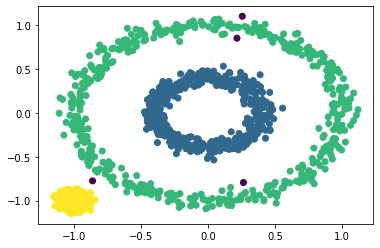

In [35]:
import numpy as np
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=5) # highly sensitive to eps
dbPred = dbscan.fit_predict(X_combine) # there is a fit_predict(), BUT no predict() method!!!

plt.scatter(X_combine[:, 0], X_combine[:, 1], c=dbPred)

# dbscan.labels_ # assigned cluster (dbPred)
# np.unique(dbscan.labels_, return_counts=True) # -1 is outliers

# CORE POINTS
# dbscan.core_sample_indices_ # index values core points
# X_combine[dbscan.core_sample_indices_] # all core points
dbscan.components_  # another way to get all core points

**Use other classification algorithm to predict cluster of unseen data points**
* Use DBSCAN results as input data, to Train a classification algorithm, and predict the cluster label
* Example: Train a KNN classifer with core points and it's labels, then do prediction on unseen data

In [34]:
# unlike K-means, it cannot predict new points
# dbscan.predict([[-1, -1]]) # WARNING: YOU CANNOT PREDICT A NEW POINT! NO predict() method!

<img src='dbscan_predict.png' width='600'>

In [36]:
# you have to use other algorithms to predict the new data point's cluster
# for example, train a Knn classifer with all core points, and its label
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
y_assigned_cluster = dbscan.labels_[dbscan.core_sample_indices_] # assigned cluster of each point

X = dbscan.components_
y = y_assigned_cluster

# Mapping result of DBSCAN (Each core point -> cluster) 
# X    y
# CP0  0
# CP1  1
# CP2  1
# ...  ...

knn.fit(X, y) # supervised learning
knn.predict([[-1, -1]]) # belong to cluster 2


array([2], dtype=int64)